# Practice Session 01+02: Data preparation

Author: <font color="blue">José M. Pérez Clar </font>

E-mail: <font color="blue">josemaria.perez02@estudiant.upf.edu</font>

Date: <font color="blue">29/9/23</font>

# 1. Exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import sklearn

In [3]:
# LEAVE AS-IS
input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [4]:
print("Column Names:\n", input_dataset.columns)
print("\nFirst 5 Rows of Data:\n", input_dataset.head())

Column Names:
 Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')

First 5 Rows of Data:
                                     PURCHASED_DEVICE  DEVICE_VALUE  \
0  TGLG29162000_LG X210BMW SMARTPHONE PRET

In [5]:
column_type_info = []

for column in input_dataset.columns:
    column_name = column
    column_type = input_dataset[column].dtype
    num_elements = input_dataset[column].nunique()
    
    column_type_info.append([column_name, column_type, num_elements])

column_type_df = pd.DataFrame(column_type_info, columns=['Column Name', 'Type', 'Num Elements'])
display(column_type_df)

,Column Name,Type,Num Elements
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182
5,DATA_TRAFFIC_MONTH_3,float64,7176
6,DATA_TRAFFIC_MONTH_4,float64,7124
7,DATA_TRAFFIC_MONTH_5,float64,7173
8,DATA_TRAFFIC_MONTH_6,float64,7074
9,VOICE_TRAFFIC_MONTH_1,float64,3550


In [6]:
column_stats = []
for column in input_dataset.columns:
    if (input_dataset[column].dtype == 'float64'):
        column_name = column
        column_mean = input_dataset[column].mean()
        column_median = np.nanmedian(input_dataset[column])
        column_max = input_dataset[column].max()
        column_min = input_dataset[column].min()

        column_stats.append([column_name, column_mean, column_median, column_max, column_min])

stats_df = pd.DataFrame(column_stats, columns=['Column Name', 'Mean', 'Median', 'Max', 'Min'])
display(stats_df)

,Column Name,Mean,Median,Max,Min
0,DEVICE_VALUE,7.504842e+02,3.930000e+02,9.057000e+03,15.00
1,LAST_DEVICE_CHANGE,2.016698e+07,2.017060e+07,2.019050e+07,20121001.00
2,DATA_TRAFFIC_MONTH_1,3.481826e+03,1.208728e+03,1.270176e+05,0.00
3,DATA_TRAFFIC_MONTH_2,3.649958e+03,1.294951e+03,1.119488e+05,0.00
4,DATA_TRAFFIC_MONTH_3,3.653427e+03,1.310675e+03,1.119488e+05,0.00
5,DATA_TRAFFIC_MONTH_4,3.269441e+03,1.176539e+03,8.785641e+04,0.00
6,DATA_TRAFFIC_MONTH_5,3.673368e+03,1.287094e+03,1.218348e+05,0.00
7,DATA_TRAFFIC_MONTH_6,3.427690e+03,1.277116e+03,9.055061e+04,0.00
8,VOICE_TRAFFIC_MONTH_1,1.548522e+02,8.405000e+01,4.220100e+03,0.00
9,VOICE_TRAFFIC_MONTH_2,1.425679e+02,7.490000e+01,3.132100e+03,0.00


In [7]:
for column in input_dataset.columns:
    print(column)
    print(input_dataset[column].describe(), "\n")

PURCHASED_DEVICE
count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object 

DEVICE_VALUE
count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64 

LAST_DEVICE_CHANGE
count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64 

DATA_TRAFFIC_MONTH_1
count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.590000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64

The results are very similar, in fact, when comparing the numerical results they are the same. Nonetheless, it is necessary to point out the fact that the .describe() function does include values for the first and third quartiles, and on top of that it also tells us the count of values. Lastly, the .describe() function also includes automatically information about the type of the column.

Brief, the .describe() function is just an easier more practical way to know statistics about the columns.

## 1.2. Inventory of device models

In [8]:
# PREVIOUS_DEVICE_MODEL
census_previous_device_model = input_dataset.copy()
census_previous_device_model = census_previous_device_model['PREVIOUS_DEVICE_MODEL'].value_counts().reset_index() #reset index adds an index for better understanding
census_previous_device_model.columns = ['PREVIOUS_DEVICE_MODEL', 'Count of Values'] #rename the columns for better understanding
print("Census of PREVIOUS_DEVICE_MODEL:")
display(census_previous_device_model)

#note that value_counts excludes NA values by default, so in this case they've been excluded

# PREVIOUS_DEVICE_BRAND
census_previous_device_brand = input_dataset.copy()
census_previous_device_brand = census_previous_device_brand['PREVIOUS_DEVICE_BRAND'].value_counts().reset_index()
census_previous_device_brand.columns = ['PREVIOUS_DEVICE_BRAND', 'Count of Values']
print("\n---------------------------------------------------------")
print("\nCensus of PREVIOUS_DEVICE_BRAND:")
display(census_previous_device_brand)


Census of PREVIOUS_DEVICE_MODEL:


,PREVIOUS_DEVICE_MODEL,Count of Values
0,iPhone 7,425
1,iPhone 6,250
2,Samsung Galaxy J5,243
3,iPhone 6S,212
4,Samsung Galaxy J1 Mini,204
...,...,...
575,LG Optimus L3 II,1
576,"Lenovo S930,Lenovo S939",1
577,Samsung Corby II,1
578,SGH-U600,1



---------------------------------------------------------

Census of PREVIOUS_DEVICE_BRAND:


,PREVIOUS_DEVICE_BRAND,Count of Values
0,Samsung,1877
1,Outros,1592
2,Apple,1548
3,Motorola,638
4,LG,514


Even though the iPhone 7 is the most sold model, Samsung has more models that are not sold as much individually but when combining the sales from all the models Samsung has sold more smartphones than Apple. 

In other words, although the smartphone with more sales is an Apple product, this only represents a part of the total sales of a company, so even though you might have the most sold smartphone, other brands might be selling almost as much from various different models and in consequence have more sales in total.

# 2. Feature engineering

## 2.1. Missing values management

In [9]:
nan_counter = pd.DataFrame(columns=['Column Name', 'NaN Count', 'Non-NaN Count'])

for column in input_dataset.columns:
    nan_count = input_dataset[column].isna().sum() #uses sum to get the total number of "true"
    non_nan_count = input_dataset[column].count() #.count() doesn't include nan
    if (nan_count >=1):
        nan_counter = nan_counter.append({'Column Name': column, 'NaN Count': nan_count, 'Non-NaN Count': non_nan_count}, ignore_index=True)

display(nan_counter)

C:\Users\josep\AppData\Local\Temp\ipykernel_28384\1263762643.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nan_counter = nan_counter.append({'Column Name': column, 'NaN Count': nan_count, 'Non-NaN Count': non_nan_count}, ignore_index=True)
C:\Users\josep\AppData\Local\Temp\ipykernel_28384\1263762643.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nan_counter = nan_counter.append({'Column Name': column, 'NaN Count': nan_count, 'Non-NaN Count': non_nan_count}, ignore_index=True)
C:\Users\josep\AppData\Local\Temp\ipykernel_28384\1263762643.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nan_counter = nan_counter.append({'Column Name': column, 'NaN Count': nan_count, 'Non-NaN Count': non_nan_count}, ignore_index=T

,Column Name,NaN Count,Non-NaN Count
0,PURCHASED_DEVICE,147,9853
1,DEVICE_VALUE,310,9690
2,LAST_DEVICE_CHANGE,2318,7682
3,DATA_TRAFFIC_MONTH_1,1132,8868
4,DATA_TRAFFIC_MONTH_2,1159,8841
5,DATA_TRAFFIC_MONTH_3,1154,8846
6,DATA_TRAFFIC_MONTH_4,1183,8817
7,DATA_TRAFFIC_MONTH_5,1134,8866
8,DATA_TRAFFIC_MONTH_6,1465,8535
9,VOICE_TRAFFIC_MONTH_1,1132,8868


In [10]:
columns_to_drop = ['PURCHASED_DEVICE', 'PREVIOUS_DEVICE_MODEL', 'DEVICE_VALUE']
nonan_dataset = input_dataset.copy()
nonan_dataset = nonan_dataset.dropna(axis=0, subset=columns_to_drop, how='any') #any indicates any nan deleates the row (axis=0)
display(nonan_dataset)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaN,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,0.0,0.0,0.0,0.0,20150622.0,NaN,42.0,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,0.0,0.0,0.0,0.0,20170419.0,20.0,20.0,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,9.0,9.0,9.0,9.0,20130326.0,8.0,69.0,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,0.0,0.0,0.0,0.0,20110214.0,NaN,94.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [11]:
columns_to_change = [ 'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                     'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                     'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                     'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                     'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                     'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                     'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                     'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']
nonan_dataset[columns_to_change].fillna(value=0, axis=0)
display(nonan_dataset)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaN,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,0.0,0.0,0.0,0.0,20150622.0,NaN,42.0,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,0.0,0.0,0.0,0.0,20170419.0,20.0,20.0,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,9.0,9.0,9.0,9.0,20130326.0,8.0,69.0,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,0.0,0.0,0.0,0.0,20110214.0,NaN,94.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [12]:
nonan_dataset['LINE_ACTIVATION_DATE'].fillna('LAST_DEVICE_CHANGE')
display(nonan_dataset)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaN,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,0.0,0.0,0.0,0.0,20150622.0,NaN,42.0,iPhone 6S,Apple Inc,Apple
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,0.0,0.0,0.0,0.0,20170419.0,20.0,20.0,iPhone 7 Plus,Apple Inc,Apple
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,9.0,9.0,9.0,9.0,20130326.0,8.0,69.0,Samsung Galaxy J7,Samsung Korea,Samsung
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,0.0,0.0,0.0,0.0,20110214.0,NaN,94.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [13]:
print("Column Names:\n", nonan_dataset.columns)
print("\nFirst 10 Rows of Data:\n", nonan_dataset.head(10))

Column Names:
 Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')

First 10 Rows of Data:
                                     PURCHASED_DEVICE  DEVICE_VALUE  \
0  TGLG29162000_LG X210BMW SMARTPHONE PRE

In [14]:
print('The rows in the original dataset: ', input_dataset.shape[0])
print('The rows in the new dataset: ', nonan_dataset.shape[0], ', which means a' ,(1-nonan_dataset.shape[0]/input_dataset.shape[0])*100,'% of columns were dropped.')

The rows in the original dataset:  10000
The rows in the new dataset:  5988 , which means a 40.12 % of columns were dropped.


## 2.2. Distributions, outliers, and correlations

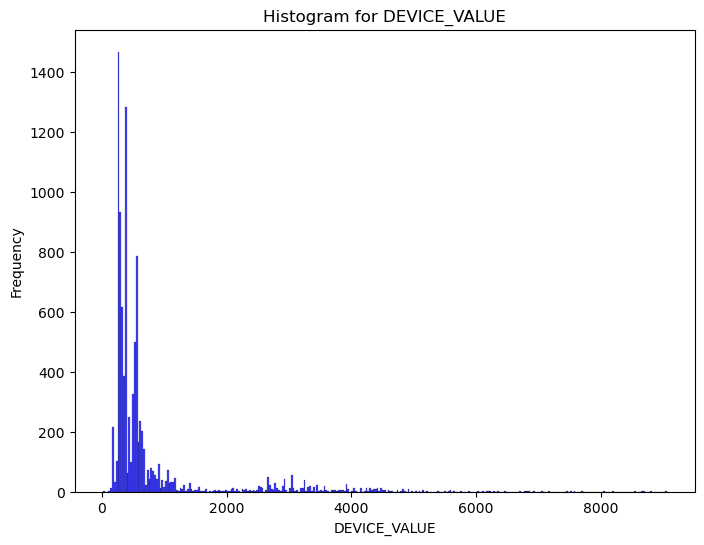

In [15]:
# Plot histogram for DEVICE_VALUE
plt.figure(figsize=(8, 6))
sns.histplot(data=input_dataset, x="DEVICE_VALUE", kde=False, color="blue")
plt.xlabel("DEVICE_VALUE")
plt.ylabel("Frequency")
plt.title("Histogram for DEVICE_VALUE")
plt.show()

For the histogram of DEVICE_VALUE we are able to somewhat recognise a normal distribution. That means that it is an unimodal distribution since it has one clear peak. However, we should mention that these statements are not 100% obvious and we should conduct certain tests to decide whether we can truly classify it as an normal distribution, since it has an abnormally long right tail and a very short (almost inexsitant) left tail.

In any case, it is not clear even though it resembles more an normal distribution than anything else.

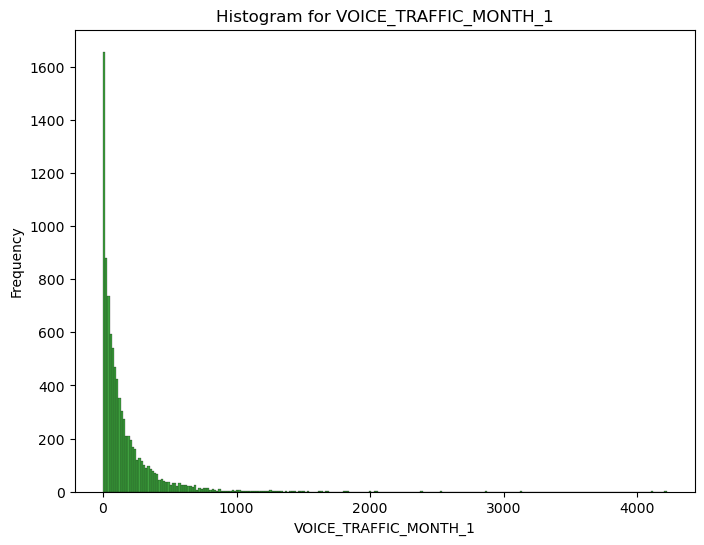

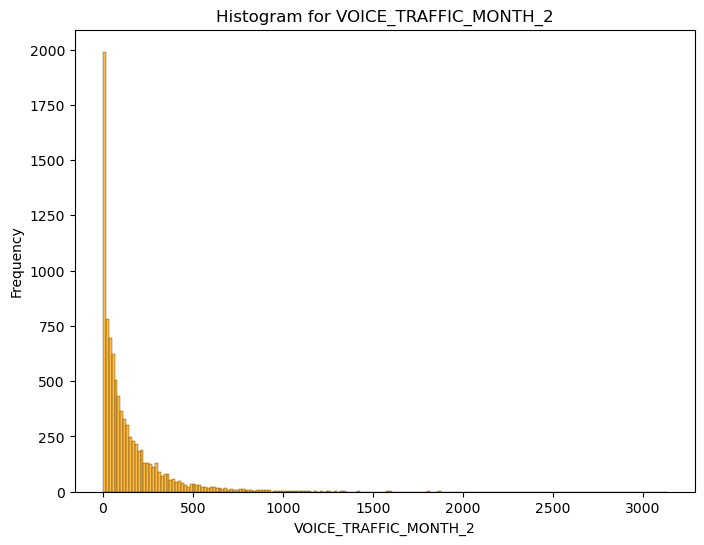

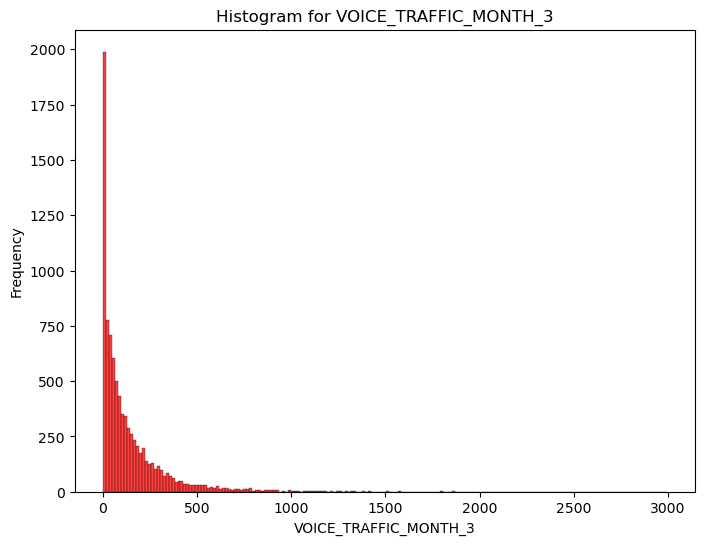

In [16]:
months = ["VOICE_TRAFFIC_MONTH_1", "VOICE_TRAFFIC_MONTH_2", "VOICE_TRAFFIC_MONTH_3"]
    
plt.figure(figsize=(8, 6))
sns.histplot(data=input_dataset, x=months[0], kde=False, color='green')
plt.xlabel(months[0])
plt.ylabel("Frequency")
plt.title("Histogram for " + months[0])
plt.show() 

plt.figure(figsize=(8, 6))
sns.histplot(data=input_dataset, x=months[1], kde=False, color='orange')
plt.xlabel(months[1])
plt.ylabel("Frequency")
plt.title("Histogram for " + months[1])
plt.show() 

plt.figure(figsize=(8, 6))
sns.histplot(data=input_dataset, x=months[2], kde=False, color='red')
plt.xlabel(months[2])
plt.ylabel("Frequency")
plt.title("Histogram for " + months[2])
plt.show() 



In this case, the commentary to be done is much simpler. The distribution is very clearly an exponential distribution. Again this is a unimodal distribution, which is distinguished by a very high starting poing that diminishes constantly up to infinity (theoretically).

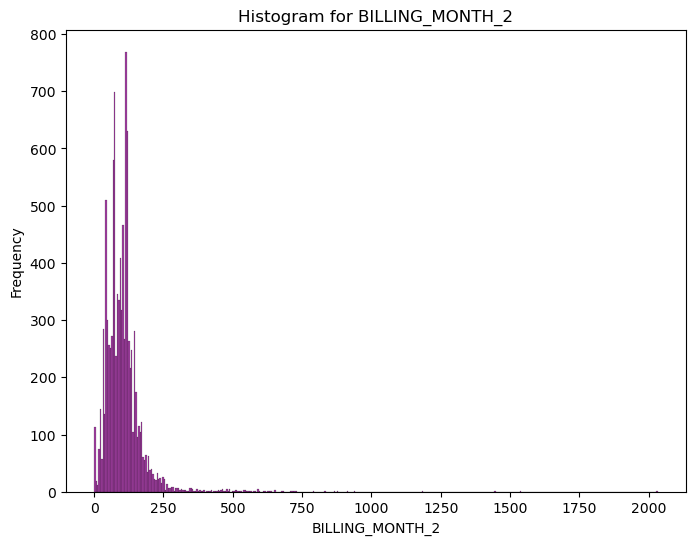

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(data=input_dataset, x="BILLING_MONTH_2", kde=False, color="purple")
plt.xlabel("BILLING_MONTH_2")
plt.ylabel("Frequency")
plt.title("Histogram for BILLING_MONTH_2")
plt.show()

In this case, we encounter a situation similar to DEVICE_VALUE. This resembles a normal distribution the most and even though it's not perfect, in this case we can see more clearly the bell shape characteristic of a normal distribution.

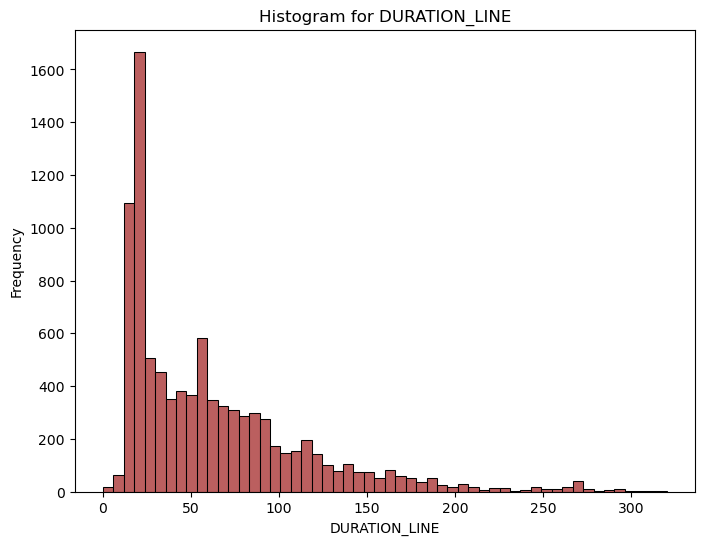

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=input_dataset, x="DURATION_LINE", kde=False, color="brown")
plt.xlabel("DURATION_LINE")
plt.ylabel("Frequency")
plt.title("Histogram for DURATION_LINE")
plt.show()

Lastly, this distribution is very similar once again to DEVICE_VALUE. The right tail is abnormally long what makes us belive that we should carry out further tests to ensure it can be classified as a normal. Nonetheless, it is undoubtedly unimodal.
Note that when removing the first two bins we end up with an almost ideal exponential distribution. This is a fact to bear in mind when considering the type of distribution we're observing in this case.

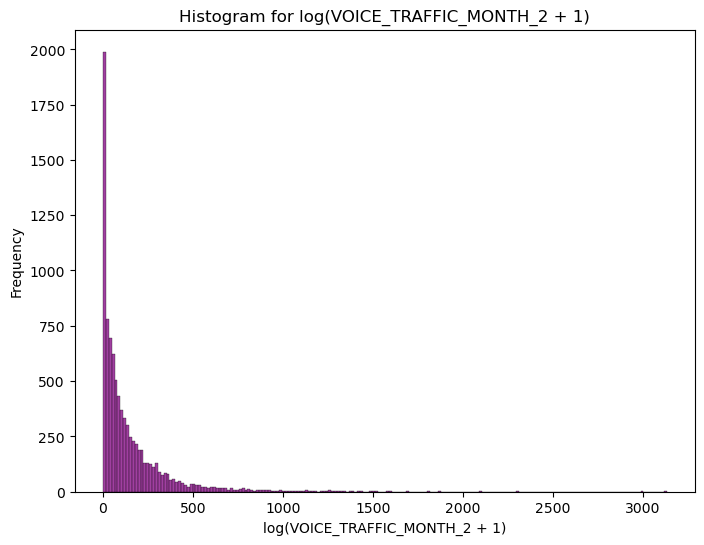

In [19]:
input_dataset_log = input_dataset.copy() #create new dataset to avoid modifying the original one
np.log1p(input_dataset_log["VOICE_TRAFFIC_MONTH_2"])

plt.figure(figsize=(8, 6))
sns.histplot(data=input_dataset_log, x="VOICE_TRAFFIC_MONTH_2", kde=False, color="purple")
plt.xlabel("log(VOICE_TRAFFIC_MONTH_2 + 1)")
plt.ylabel("Frequency")
plt.title("Histogram for log(VOICE_TRAFFIC_MONTH_2 + 1)")
plt.show()


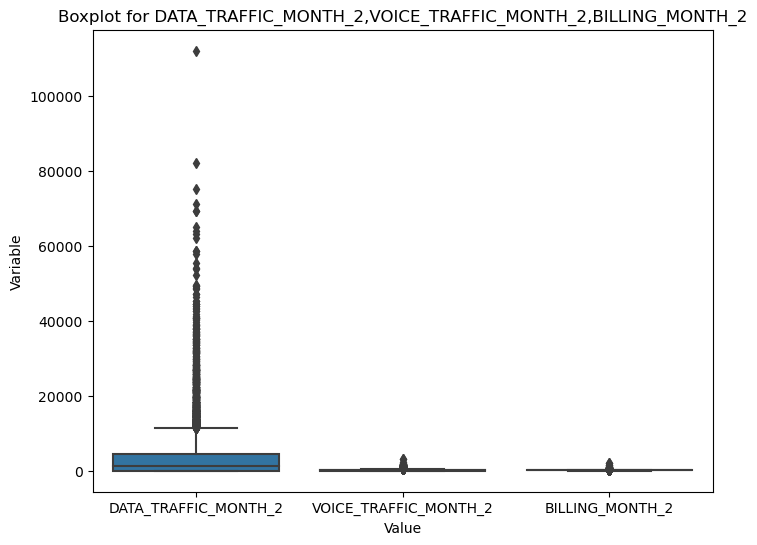

In [20]:
columns_to_plot = ['DATA_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_2','BILLING_MONTH_2']
data_to_plot = input_dataset[columns_to_plot]

plt.figure(figsize=(8, 6))
sns.boxplot(data=input_dataset[columns_to_plot])
plt.ylabel("Variable")
plt.xlabel("Value")
plt.title("Boxplot for DATA_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_2,BILLING_MONTH_2")
plt.show()

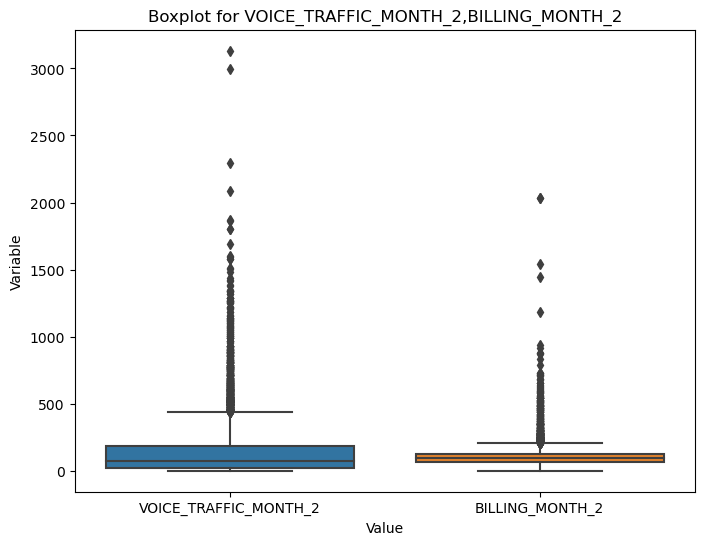

In [21]:
columns_to_plot = ['VOICE_TRAFFIC_MONTH_2','BILLING_MONTH_2']
data_to_plot = input_dataset[columns_to_plot]

plt.figure(figsize=(8, 6))
sns.boxplot(data=input_dataset[columns_to_plot])
plt.ylabel("Variable")
plt.xlabel("Value")
plt.title("Boxplot for VOICE_TRAFFIC_MONTH_2,BILLING_MONTH_2")
plt.show()

In box plots, the outliers are identified as rhombi which fall out of the plot itself. For this reason, looking at the plots I would define the extreme values as follows:

DATA_TRAFFIC_MONTH_2: x>12000 is an outlier

VOICE_TRAFFIC_MONTH_2: x>460 is an outlier

BILLING_MONTH_2: x>250 is an outlier

Note that an extra plot was made to properly see the last two attributes described.

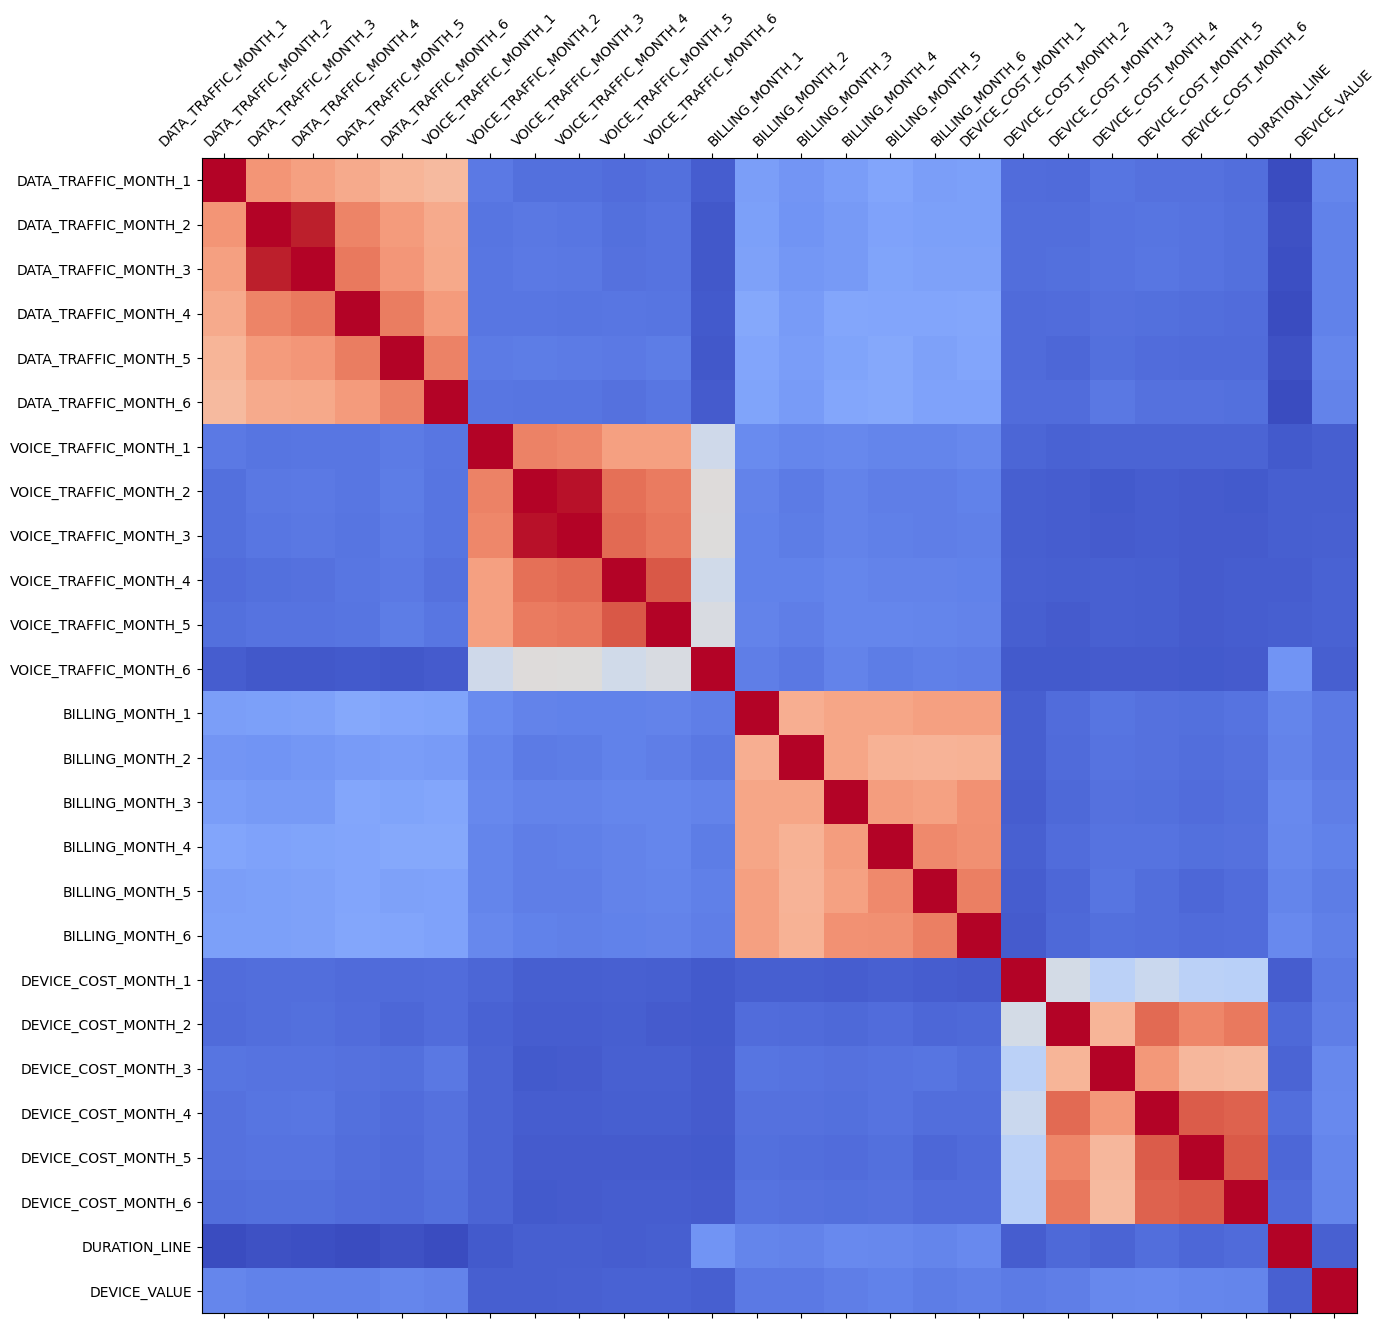

In [22]:
columns_for_matrix = [ 'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                     'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                     'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                     'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                     'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                     'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                     'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                     'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 
                      'DURATION_LINE', 'DEVICE_VALUE']

matrix = input_dataset[columns_for_matrix].corr(method='pearson', min_periods=1)
plt.figure(figsize=(20, 15))
plt.matshow(matrix, fignum=0, cmap="coolwarm") #this color map is easier to interpret
plt.xticks(np.arange(len(columns_for_matrix)), columns_for_matrix, rotation=45)#rotation for the names
plt.yticks(np.arange(len(columns_for_matrix)), columns_for_matrix)
plt.show()

Thanks to the correlation matrix we can see that the billing is in general more correlated with the voice traffic. This happens because we can observe how the color of the matrix is darker in this region, which indicates a higher correlation. In fact, this makes sense as calls tend to be more expensive than data usage, at least in somewhat recent years.

## 2.3. Date management and period calculation

In [23]:
input_dataset_dates = input_dataset.copy()
max_last_device_change_str = str(int(input_dataset_dates['LAST_DEVICE_CHANGE'].max()))
latest_change = datetime.datetime.strptime(max_last_device_change_str, "%Y%m%d")
now = latest_change + datetime.timedelta(days=30)

print(latest_change)
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


In [24]:
series_converted = pd.to_datetime(input_dataset_dates['LAST_DEVICE_CHANGE'], format='%Y%m%d')
difference_in_months = (now - series_converted) / (30 * datetime.timedelta(days=1))
input_dataset_dates['MONTHS_LAST_DEVICE'] = difference_in_months.fillna(0).astype(int)

#display(input_dataset['MONTHS_LAST_DEVICE']) to check the changes
display(input_dataset_dates['MONTHS_LAST_DEVICE'])

0        0
1       26
2        0
3       20
4        5
        ..
9995    26
9996    14
9997     0
9998    14
9999     0
Name: MONTHS_LAST_DEVICE, Length: 10000, dtype: int32

In [25]:
series_converted_2 = pd.to_datetime(input_dataset_dates['LINE_ACTIVATION_DATE'], format='%Y%m%d')
difference_in_months_2 = (now - series_converted_2) / (30 * datetime.timedelta(days=1))
input_dataset_dates['DURATION_LINE'] = difference_in_months_2.fillna(0).astype(int)

display(input_dataset['DURATION_LINE'])
display(input_dataset_dates['DURATION_LINE'])

average_duration_years = input_dataset_dates['DURATION_LINE'].mean()/365
print('The average duration of DURATION_LINE is', average_duration_years, 'years')

0       172.0
1        20.0
2       176.0
3        88.0
4        54.0
        ...  
9995     20.0
9996     69.0
9997     94.0
9998     94.0
9999     94.0
Name: DURATION_LINE, Length: 10000, dtype: float64

0       175
1        26
2       184
3        94
4        60
       ... 
9995     25
9996     75
9997    100
9998    100
9999    100
Name: DURATION_LINE, Length: 10000, dtype: int32

The average duration of DURATION_LINE is 0.16290739726027398 years



## 2.4. Standarization and scaling of numerical variables

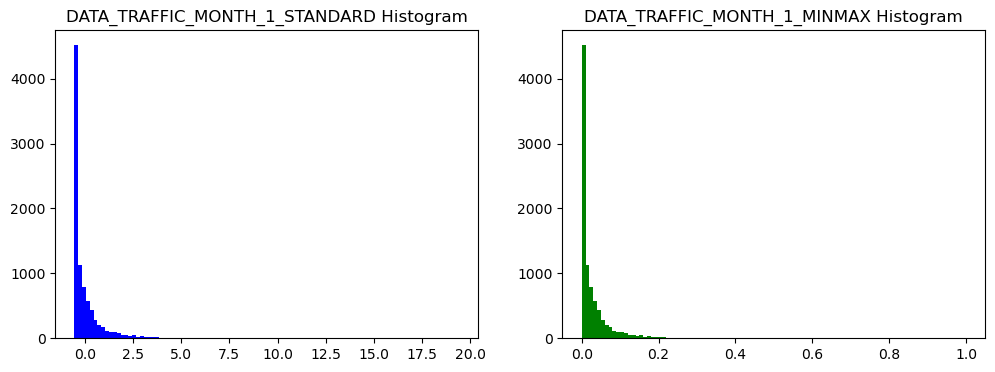

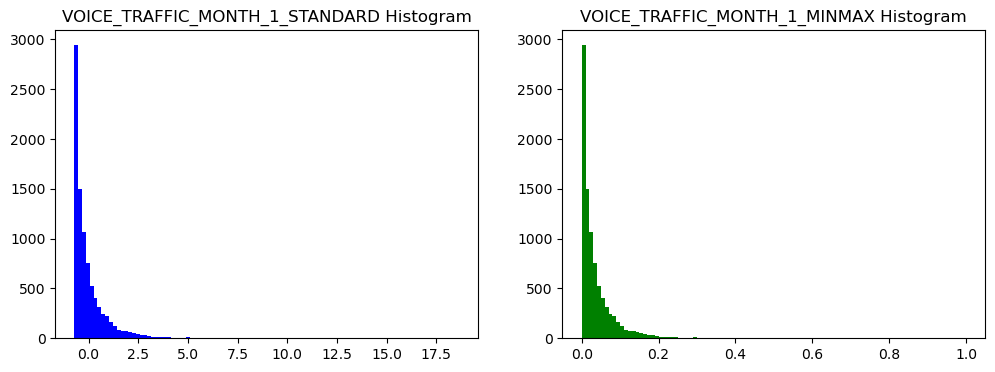

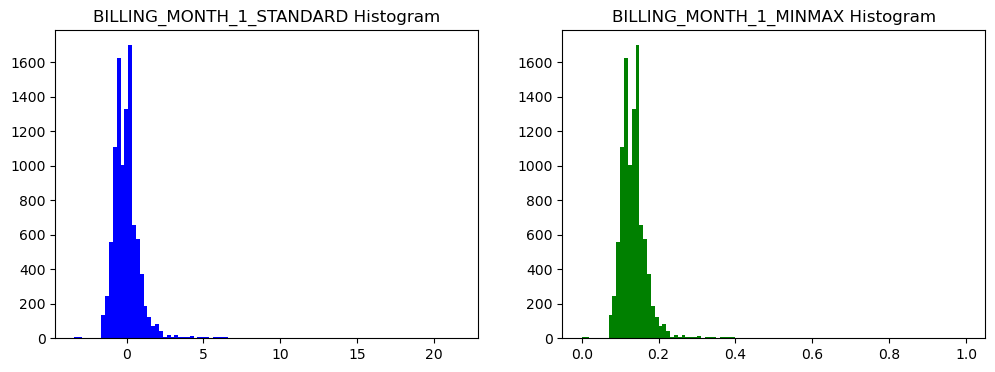

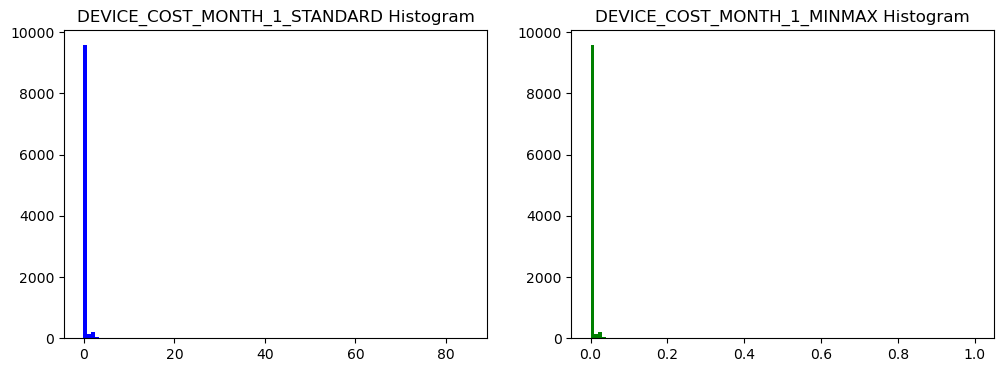

In [26]:
input_dataset_scaled = input_dataset.copy()
columns_to_scale = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

for column in columns_to_scale:
    std_column_name = column + '_STANDARD'
    input_dataset_scaled[std_column_name] = StandardScaler().fit_transform(input_dataset_scaled[[column]])
    
    minmax_column_name = column + '_MINMAX'
    input_dataset_scaled[minmax_column_name] = MinMaxScaler().fit_transform(input_dataset_scaled[[column]])
    
    #WE SEPARATE THE DATA NORMALISATION FROM THE PLOTING, BUT IT COULD BE DONE IN THE SAME LOOP
    
for column in columns_to_scale:
    std_column_name = column + '_STANDARD'
    minmax_column_name = column + '_MINMAX'
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(input_dataset_scaled[std_column_name], bins=100, color='blue')
    plt.title(std_column_name + ' Histogram')
    
    plt.subplot(1, 2, 2)
    plt.hist(input_dataset_scaled[minmax_column_name], bins=100, color='green')
    plt.title(minmax_column_name + ' Histogram')
    
    plt.show()


## 2.5. Convert categorical columns to dummy binary variables

In [27]:
input_dataset_cat = input_dataset.copy()
label_encoder = LabelEncoder()
input_dataset_cat['PREVIOUS_DEVICE_BRAND_INT_ENCODED'] = label_encoder.fit_transform(input_dataset_cat['PREVIOUS_DEVICE_BRAND'])

display(input_dataset_cat[['PREVIOUS_DEVICE_BRAND', 'PREVIOUS_DEVICE_BRAND_INT_ENCODED']])

,PREVIOUS_DEVICE_BRAND,PREVIOUS_DEVICE_BRAND_INT_ENCODED
0,Motorola,2
1,Samsung,4
2,Motorola,2
3,Apple,0
4,Outros,3
...,...,...
9995,Apple,0
9996,Samsung,4
9997,Motorola,2
9998,NaN,5


In [28]:
device_manuf_dummies = pd.get_dummies(input_dataset_cat['PREVIOUS_DEVICE_MANUF'], prefix='PREVIOUS_DEVICE_MANUF_')
input_dataset_cat = pd.concat([input_dataset_cat, device_manuf_dummies], axis=1)

display(input_dataset_cat)
#print(input_dataset_cat['PREVIOUS_DEVICE_MANUF__Vogtec (H.K) Co Ltd'].sum()) #proof that it is working

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF__Telit Communications SpA,PREVIOUS_DEVICE_MANUF__Topmax Glory Limited,PREVIOUS_DEVICE_MANUF__Umi Network Technology Co Limited,PREVIOUS_DEVICE_MANUF__United Mobile,PREVIOUS_DEVICE_MANUF__United Time Hong Kong Ltd,PREVIOUS_DEVICE_MANUF__Vikin Communication Technology Co Limited,PREVIOUS_DEVICE_MANUF__Vogtec (H.K) Co Ltd,PREVIOUS_DEVICE_MANUF__Xiaomi Communications Co Ltd,PREVIOUS_DEVICE_MANUF__ZTE Corporation,PREVIOUS_DEVICE_MANUF__u-blox AG
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.500000,...,0,0,0,0,0,0,0,0,0,0
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.700000,...,0,0,0,0,0,0,0,0,0,0
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.100000,...,0,0,0,0,0,0,0,0,0,0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.700000,...,0,0,0,0,0,0,0,0,0,0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.899990,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.500000,...,0,0,0,0,0,0,0,0,0,0
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.500000,...,0,0,0,0,0,0,0,0,0,0
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.500000,...,0,0,0,0,0,0,0,0,0,0
9998,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1448.72900,1495.66150,1495.66150,996.024960,431.708250,467.17126,51.799999,...,0,0,0,0,0,0,0,0,0,0


## 2.6. Feature generation

In [29]:
input_dataset_stats = input_dataset.copy()

#DATA_TRAFFIC_MONTH
input_dataset_stats['DATA_TRAFFIC_MEAN'] = input_dataset_stats[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                                                               'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].mean(axis=1)

input_dataset_stats['DATA_TRAFFIC_MAX'] = input_dataset_stats[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                                                             'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].max(axis=1)

input_dataset_stats['DATA_TRAFFIC_MIN'] = input_dataset_stats[['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                                                             'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6']].min(axis=1)

input_dataset_stats['DATA_TRAFFIC_RANGE'] = input_dataset_stats['DATA_TRAFFIC_MAX'] - input_dataset_stats['DATA_TRAFFIC_MIN']

# VOICE_TRAFFIC_MONTH
input_dataset_stats['VOICE_TRAFFIC_MEAN'] = input_dataset_stats[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                                                                'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].mean(axis=1)

input_dataset_stats['VOICE_TRAFFIC_MAX'] = input_dataset_stats[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                                                              'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].max(axis=1)

input_dataset_stats['VOICE_TRAFFIC_MIN'] = input_dataset_stats[['VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                                                              'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6']].min(axis=1)

input_dataset_stats['VOICE_TRAFFIC_RANGE'] = input_dataset_stats['VOICE_TRAFFIC_MAX'] - input_dataset_stats['VOICE_TRAFFIC_MIN']

#BILLING_MONTH
input_dataset_stats['BILLING_MEAN'] = input_dataset_stats[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                                                           'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].mean(axis=1)

input_dataset_stats['BILLING_MAX'] = input_dataset_stats[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                                                         'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].max(axis=1)

input_dataset_stats['BILLING_MIN'] = input_dataset_stats[['BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                                                         'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6']].min(axis=1)

input_dataset_stats['BILLING_RANGE'] = input_dataset_stats['BILLING_MAX'] - input_dataset_stats['BILLING_MIN']

# DEVICE_COST_MONTH
input_dataset_stats['DEVICE_COST_MEAN'] = input_dataset_stats[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                                                             'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].mean(axis=1)

input_dataset_stats['DEVICE_COST_MAX'] = input_dataset_stats[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                                                            'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].max(axis=1)

input_dataset_stats['DEVICE_COST_MIN'] = input_dataset_stats[['DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                                                            'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']].min(axis=1)

input_dataset_stats['DEVICE_COST_RANGE'] = input_dataset_stats['DEVICE_COST_MAX'] - input_dataset_stats['DEVICE_COST_MIN']

display(input_dataset_stats)


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,VOICE_TRAFFIC_MIN,VOICE_TRAFFIC_RANGE,BILLING_MEAN,BILLING_MAX,BILLING_MIN,BILLING_RANGE,DEVICE_COST_MEAN,DEVICE_COST_MAX,DEVICE_COST_MIN,DEVICE_COST_RANGE
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.500000,...,21.799999,57.899998,92.958333,107.93,85.00,22.93,12.0,12.0,12.0,0.0
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.700000,...,0.500000,4.400000,49.435000,56.56,47.00,9.56,0.0,0.0,0.0,0.0
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.100000,...,26.100000,192.600000,121.781667,129.14,113.77,15.37,0.0,0.0,0.0,0.0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.700000,...,119.000000,112.200000,58.216667,60.93,55.99,4.94,6.0,6.0,6.0,0.0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.899990,...,0.000000,383.899990,109.700000,110.69,107.99,2.70,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.500000,...,119.700000,134.000000,52.486667,52.97,51.67,1.30,0.0,0.0,0.0,0.0
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.500000,...,0.000000,88.500000,134.990000,134.99,134.99,0.00,9.0,9.0,9.0,0.0
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.500000,...,0.000000,38.500000,157.480000,203.53,134.99,68.54,0.0,0.0,0.0,0.0
9998,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1448.72900,1495.66150,1495.66150,996.024960,431.708250,467.17126,51.799999,...,0.000000,51.799999,114.990000,114.99,114.99,0.00,9.0,9.0,9.0,0.0


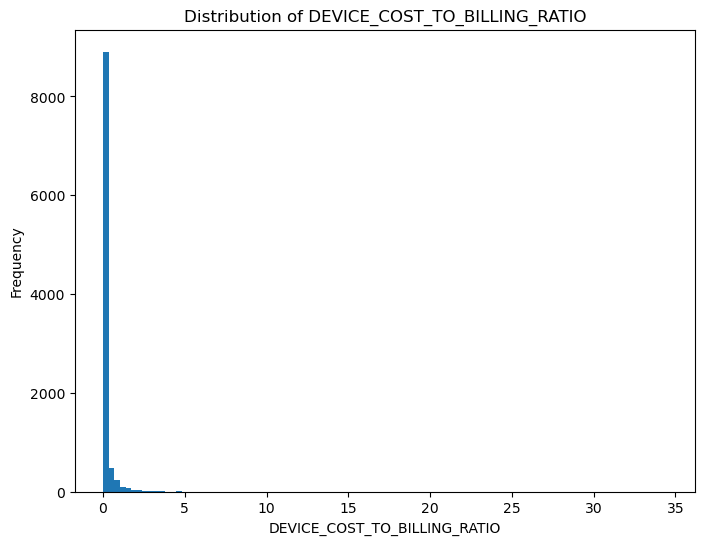

In [30]:
input_dataset_stats['DEVICE_COST_TO_BILLING_RATIO'] = input_dataset_stats['DEVICE_COST_MEAN'] / input_dataset_stats['BILLING_MEAN']

plt.figure(figsize=(8, 6))
plt.hist(input_dataset_stats['DEVICE_COST_TO_BILLING_RATIO'], bins=100) #added bins to see better the distribution
plt.xlabel('DEVICE_COST_TO_BILLING_RATIO')
plt.ylabel('Frequency')
plt.title('Distribution of DEVICE_COST_TO_BILLING_RATIO')
plt.show()

This distribution is an exponential distribution, starting at a very high peak and infinitely descreasing (mathematically speaking). As we've commented already before, this is an unimodal distribution since it only has one peak.

## 2.7. Text parsing/processing

In [31]:
input_dataset_textproc = input_dataset.copy() #since it was not explicitly said, I did not use the  the nonan dataset. It would be as easy as changing the name of the dataset included below
split_columns_1 = input_dataset_textproc['PURCHASED_DEVICE'].str.split('_', n=2, expand=True)
input_dataset_textproc['PURCHASED_DEVICE_CODE'] = split_columns_1[0]
input_dataset_textproc['PURCHASED_DEVICE_MANUFACTURER'] = split_columns_1[1]

split_columns_2 = input_dataset_textproc['PURCHASED_DEVICE_MANUFACTURER'].str.split(' ', n=1, expand=True)
input_dataset_textproc['PURCHASED_DEVICE_MANUFACTURER'] = split_columns_2[0]
input_dataset_textproc['PURCHASED_DEVICE_MODEL'] = split_columns_2[1]

display(input_dataset_textproc)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.500000,...,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.700000,...,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.100000,...,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.700000,...,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.899990,...,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,20170401.0,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.500000,...,0.0,20170419.0,20.0,20.0,iPhone 7 Plus,Apple Inc,Apple,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.500000,...,9.0,20130326.0,8.0,69.0,Samsung Galaxy J7,Samsung Korea,Samsung,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaN,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.500000,...,0.0,20110214.0,NaN,94.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9998,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,20180401.0,1448.72900,1495.66150,1495.66150,996.024960,431.708250,467.17126,51.799999,...,9.0,20110214.0,8.0,94.0,NaN,NaN,NaN,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


In [32]:
#PURCHASED_DEVICE_MANUFACTURER
purchased_device_manufacturer_counts = input_dataset_textproc['PURCHASED_DEVICE_MANUFACTURER'].value_counts().reset_index()
purchased_device_manufacturer_counts.columns = ['Manufacturer', 'Number of Devices in PURCHASED_DEVICE_MANUFACTURER']

#PREVIOUS_DEVICE_MANUF
previous_device_manufacturer_counts = input_dataset_textproc['PREVIOUS_DEVICE_MANUF'].value_counts().reset_index()
previous_device_manufacturer_counts.columns = ['Manufacturer', 'Number of Devices in PREVIOUS_DEVICE_MANUF']

print("Table for devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER:")
display(purchased_device_manufacturer_counts)

print("\nTable for devices per manufacturer in PREVIOUS_DEVICE_MANUF:")
display(previous_device_manufacturer_counts)


Table for devices per manufacturer in PURCHASED_DEVICE_MANUFACTURER:


,Manufacturer,Number of Devices in PURCHASED_DEVICE_MANUFACTURER
0,LG,5856
1,SAMSUNG,1779
2,MOTOROLA,1067
3,APPLE,679
4,ALCATEL,468
5,ASUS,4



Table for devices per manufacturer in PREVIOUS_DEVICE_MANUF:


,Manufacturer,Number of Devices in PREVIOUS_DEVICE_MANUF
0,Samsung Korea,1928
1,Apple Inc,1548
2,"Motorola Mobility LLC, a Lenovo Company",879
3,LG Electronics Inc.,519
4,TCL Communication Ltd,283
...,...,...
63,Motorola,1
64,Ha Wah Technology Electronic Limited,1
65,Group Acquisitions Limited,1
66,Hongkong IPRO Technology Co Limited,1


## 2.8. Splitting and sampling a dataset

In [33]:
input_dataset_copy = input_dataset.copy()
input_dataset_70_split, input_dataset_30_split = train_test_split(input_dataset_copy, test_size=0.3)

In [34]:
columns_to_change = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1']

train_stats = input_dataset_70_split[columns_to_change].describe()
test_stats = input_dataset_30_split[columns_to_change].describe()

print("Main statistics for the training dataset (70%):")
display(train_stats)

print("\nMain statistics for the testing dataset (30%):")
display(test_stats)

Main statistics for the training dataset (70%):


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,6186.000000,6186.000000,6999.000000
mean,3499.677531,155.937359,102.871249
std,6365.423911,219.982594,68.531074
min,0.000000,0.000000,-124.490000
25%,60.993826,27.900000,66.265000
50%,1243.191800,85.400002,96.390000
75%,4286.067000,199.374993,123.005000
max,112421.170000,4220.100100,1569.100000



Main statistics for the testing dataset (30%):


,DATA_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_1,BILLING_MONTH_1
count,2682.000000,2682.000000,3000.000000
mean,3440.650549,152.349329,101.115810
std,6363.505527,214.221987,66.013932
min,0.000000,0.000000,-128.010000
25%,37.491885,24.600000,65.460000
50%,1141.340200,80.649997,93.000000
75%,4138.119275,198.724992,121.140000
max,127017.590000,3132.100100,911.720000


The statistics do differ significantly, and it comes as no surprise since the statistics for variables like mean, standard deviation, min, max and percentiles depend on the data distribution they belong to. In fact, in most cases, we can see that the statistics are close but not identical between the two splits since we have divided the data randomly.

Nonetheless, if we did have a sufficiently large dataset (we sort of do) and the data was well-distributed, the differences in statistics between the two splits would become be minimal. 

Lastly, we must mention that this is not a problem since we must remember that the purpose of splitting the dataset into training and testing sets is to evaluate the model's performance on unseen data.

# 3. Comparing iPhone and Samsung J series users

In [35]:
# Have an Apple iPhone
apple_users_dataset = input_dataset.copy()
apple_users_dataset = apple_users_dataset[input_dataset['PURCHASED_DEVICE'].str.contains('APPLE', case=False, na= False)]

#WE VERIFY THAT THE PURCHASED DEVICE HAS APPLE/SAMSUNG IN THE NAME

# Have a Samsung
samsung_users_dataset = input_dataset.copy()
samsung_users_dataset = samsung_users_dataset[input_dataset['PURCHASED_DEVICE'].str.contains('SAMSUNG', case=False,na= False)]

display(apple_users_dataset)
display(samsung_users_dataset)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.5745,2196.5745,1815.7009,2101.6816,3224.2834,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
18,DGAP067C2000_APPLE IPHONE 8 64GB CINZA PPB/PI6...,3081.0,20170901.0,990.27838,1011.0970,1011.0970,1025.9695,2778.3501,1822.9507,102.900000,...,124.0,124.0,124.0,124.0,20141230.0,15.0,48.0,iPhone 6S,Apple Inc,Apple
29,DGAP08163000_APPLE IPHONE XR 64GB PRETO,3705.0,20170801.0,5299.35060,3154.5264,3154.5264,3621.6301,3207.3867,3275.4487,252.500000,...,12.0,12.0,12.0,12.0,20170824.0,16.0,16.0,NaN,NaN,NaN
37,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3801.0,20190201.0,3119.14230,1747.4230,1747.4230,1864.1172,1647.2505,1315.0476,190.100010,...,183.0,183.0,183.0,183.0,20161006.0,-2.0,26.0,NaN,NaN,NaN
39,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3681.0,20161001.0,3916.90450,2703.3223,2703.3223,1860.9038,3112.7732,2625.4236,160.899990,...,183.0,183.0,183.0,183.0,20161006.0,26.0,26.0,iPhone 6S,Apple Inc,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20190101.0,10507.84500,18425.2700,18425.2700,16613.0920,12980.1870,10147.5430,258.100010,...,0.0,0.0,0.0,0.0,20180124.0,-1.0,11.0,NaN,NaN,NaN
9891,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,3636.13940,3975.1948,3975.1948,4893.0195,4364.0420,3992.2976,18.500000,...,0.0,0.0,0.0,0.0,20180124.0,11.0,11.0,iPhone SE,Apple Inc,Apple
9892,DGAP069C3000_APPLE IPHONE 8 PLUS 64GB CINZA BA...,3777.0,20170101.0,1023.11510,2831.4214,2831.4214,3015.2114,2819.5559,1135.8162,51.700001,...,13.0,13.0,13.0,13.0,20141216.0,23.0,48.0,iPhone 6,Apple Inc,Apple
9917,DGAP08163000_APPLE IPHONE XR 64GB PRETO,4305.0,20180101.0,2432.91110,5159.8462,5159.8462,3041.3901,2613.5793,2976.4900,85.400002,...,0.0,0.0,0.0,0.0,20180124.0,11.0,11.0,iPhone 6,Apple Inc,Apple


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
12,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,921.0,NaN,0.000000,0.00000,0.00000,0.0000,0.000000,0.00000,171.300000,...,0.0,0.0,0.0,0.0,20100806.0,NaN,100.0,MC55i,Gemalto M2M GmbH,Outros
23,TGSA32564007_SAMSUNG J260M SMART PRETO PPB/PI...,633.0,20160801.0,4.528594,464.08774,695.09595,223.3302,223.330200,247.85382,298.000000,...,0.0,0.0,0.0,15.0,20080627.0,30.0,128.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
33,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,705.0,20141001.0,8396.934600,9907.53130,9907.53130,5994.0210,6872.605500,5246.00390,153.000000,...,71.0,71.0,71.0,71.0,19980727.0,50.0,245.0,Samsung Galaxy S4 Mini,Samsung Korea,Samsung
34,TGSA32062000_SAMSUNG J415G SMART PRETO PPB/PI1...,681.0,20150201.0,0.000000,0.00000,0.00000,0.0000,0.000000,0.00000,330.700010,...,0.0,0.0,0.0,0.0,20090226.0,46.0,118.0,NaN,NaN,NaN
57,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1545.0,20140101.0,2047.255400,1597.98750,1597.98750,1501.0490,843.063050,1631.06650,74.400002,...,0.0,0.0,0.0,0.0,20040909.0,59.0,171.0,Samsung Galaxy J7,Samsung Korea,Samsung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI1...,825.0,NaN,1853.572100,3257.88210,3257.88210,2713.7256,2721.106000,3547.49240,626.000000,...,0.0,0.0,0.0,0.0,20140919.0,NaN,51.0,NaN,NaN,NaN
9966,TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...,1137.0,NaN,4343.867700,5593.42580,5593.42580,4548.7456,80.533676,1497.05050,10.600000,...,0.0,0.0,0.0,0.0,20110324.0,NaN,93.0,GE12072145,"Motorola Mobility LLC, a Lenovo Company",Outros
9971,TGSA28564007_SAMSUNG J105 SMART PRETO PPB/PI3...,441.0,20180201.0,0.000000,NaN,NaN,NaN,NaN,NaN,161.300000,...,13.0,13.0,13.0,13.0,20171208.0,10.0,12.0,Alcatel Pixi 4 3.5,TCL Communication Ltd,Outros
9989,TGSA31362000_SAMSUNG J400M SMART PRETO PPB/PI1...,513.0,20161001.0,5656.491200,4798.86520,4798.86520,5056.8506,4584.034700,5088.20260,104.700000,...,0.0,0.0,0.0,0.0,20161011.0,26.0,26.0,iPhone 6S,Apple Inc,Apple


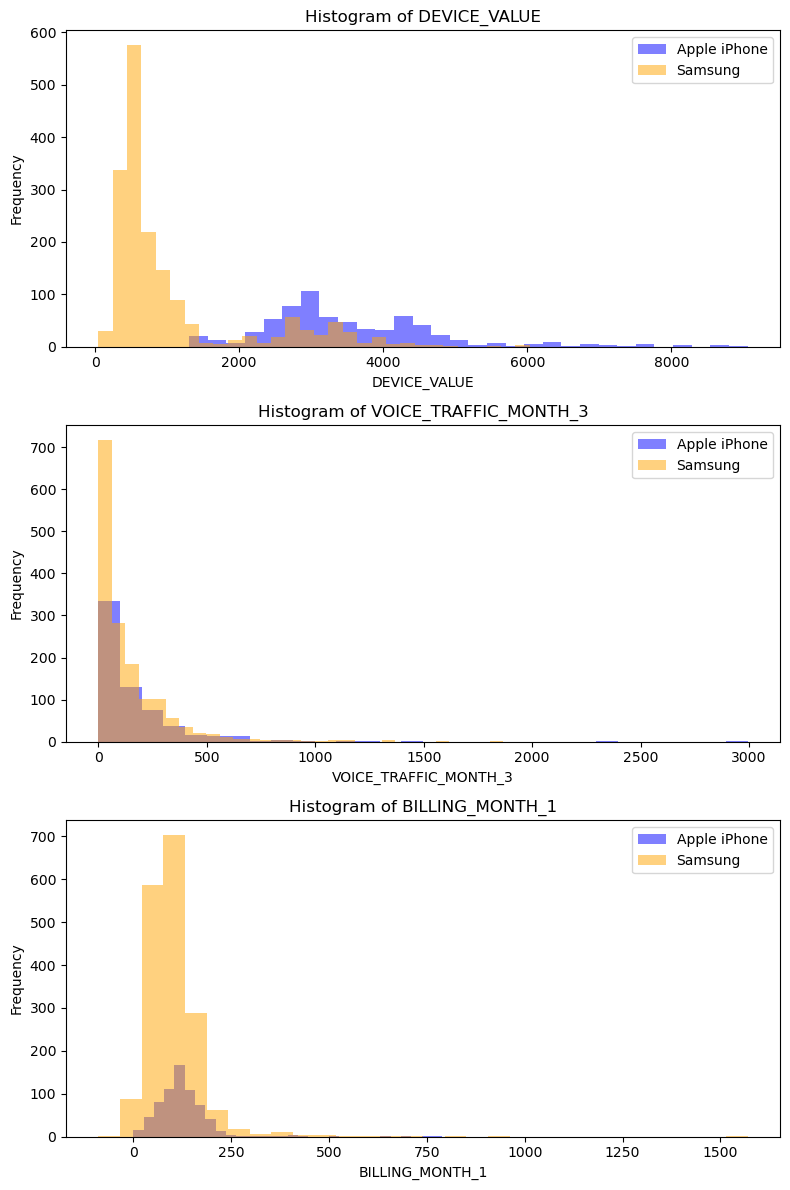

In [36]:
columns_to_compare = ['DEVICE_VALUE', 'VOICE_TRAFFIC_MONTH_3', 'BILLING_MONTH_1']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

for i, column in enumerate(columns_to_compare):
    ax = axes[i]
    ax.hist(apple_users_dataset[column].dropna(), bins=30, alpha=0.5, label='Apple iPhone', color='blue')
    ax.hist(samsung_users_dataset[column].dropna(), bins=30, alpha=0.5, label='Samsung', color='orange')
    ax.set_title('Histogram of ' + column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
    
    #alpha determines the transparency of the plots

plt.tight_layout() #function used to ensure histograms are displayed correctly and do not overlap.
plt.show()


Looking at these plots we can extract some differences between Samsung and Apple users.

In the first place, in terms of the value of the device we can see that the values of the Samsung devices are almost in their totality smaller than the value of Apple devices, except for a few that are comparable to Apple. Moreover, Apple devices' value are considerably more spread out than Samsungs' values, but if we wanted to extract a conclusion from the data it would be that Apple devices' values are generally higher, even though there's more variability to them than to Smasungs' devices, which are more focused at the lower end.

Secondly, as far the histogram of VOICE_TRAFFIC_MONTH_3 goes, we can see there almost is not any difference between Samsung and Apple. Even though the yellow lines are taller, this only happens because there are more Samsung than Apple samples in the dataset. We can conclude that either having an Apple or a Samsung device does not impact the voice traffic (month 3).

Lastly, when it comes to billing in month 1, we come across a very similar situation to the previous paragraph.The values are exactly the same with the difference that the distribution is scaled down for Apple because it has lees samples in the dataset. If the number of samples was the same, the last two histograms would be almost identical for Apple and Samsung.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>